### Exploratory Data Analysis of IU Chest X-ray Processed Dataset 

This notebook analyzes the Indiana University Chest X-ray dataset processed one with complete report, including image visualization, report analysis, data projections, and preparation for model evaluation.

In [9]:
# 1. Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os

In [10]:
# 2. Load and Explore the New Dataset
image_dir = '/Users/pujasaha/Documents/iu_xray/complete_dataset/images'
projections_path = '/Users/pujasaha/Documents/iu_xray/complete_dataset/indiana_projections_complete.csv'
reports_path = '/Users/pujasaha/Documents/iu_xray/complete_dataset/indiana_reports_complete.csv'

projections_df = pd.read_csv(projections_path)
reports_df = pd.read_csv(reports_path)

print('Projections shape:', projections_df.shape)
print('Reports shape:', reports_df.shape)
print('Projections columns:', projections_df.columns)
print('Reports columns:', reports_df.columns)

# Check for missing values
def missing_summary(df):
    return df.isnull().sum()[df.isnull().sum() > 0]

print('Missing values in projections:')
print(missing_summary(projections_df))
print('Missing values in reports:')
print(missing_summary(reports_df))

Projections shape: (4767, 3)
Reports shape: (2459, 8)
Projections columns: Index(['uid', 'filename', 'projection'], dtype='object')
Reports columns: Index(['uid', 'MeSH', 'Problems', 'image', 'indication', 'comparison',
       'findings', 'impression'],
      dtype='object')
Missing values in projections:
Series([], dtype: int64)
Missing values in reports:
Series([], dtype: int64)


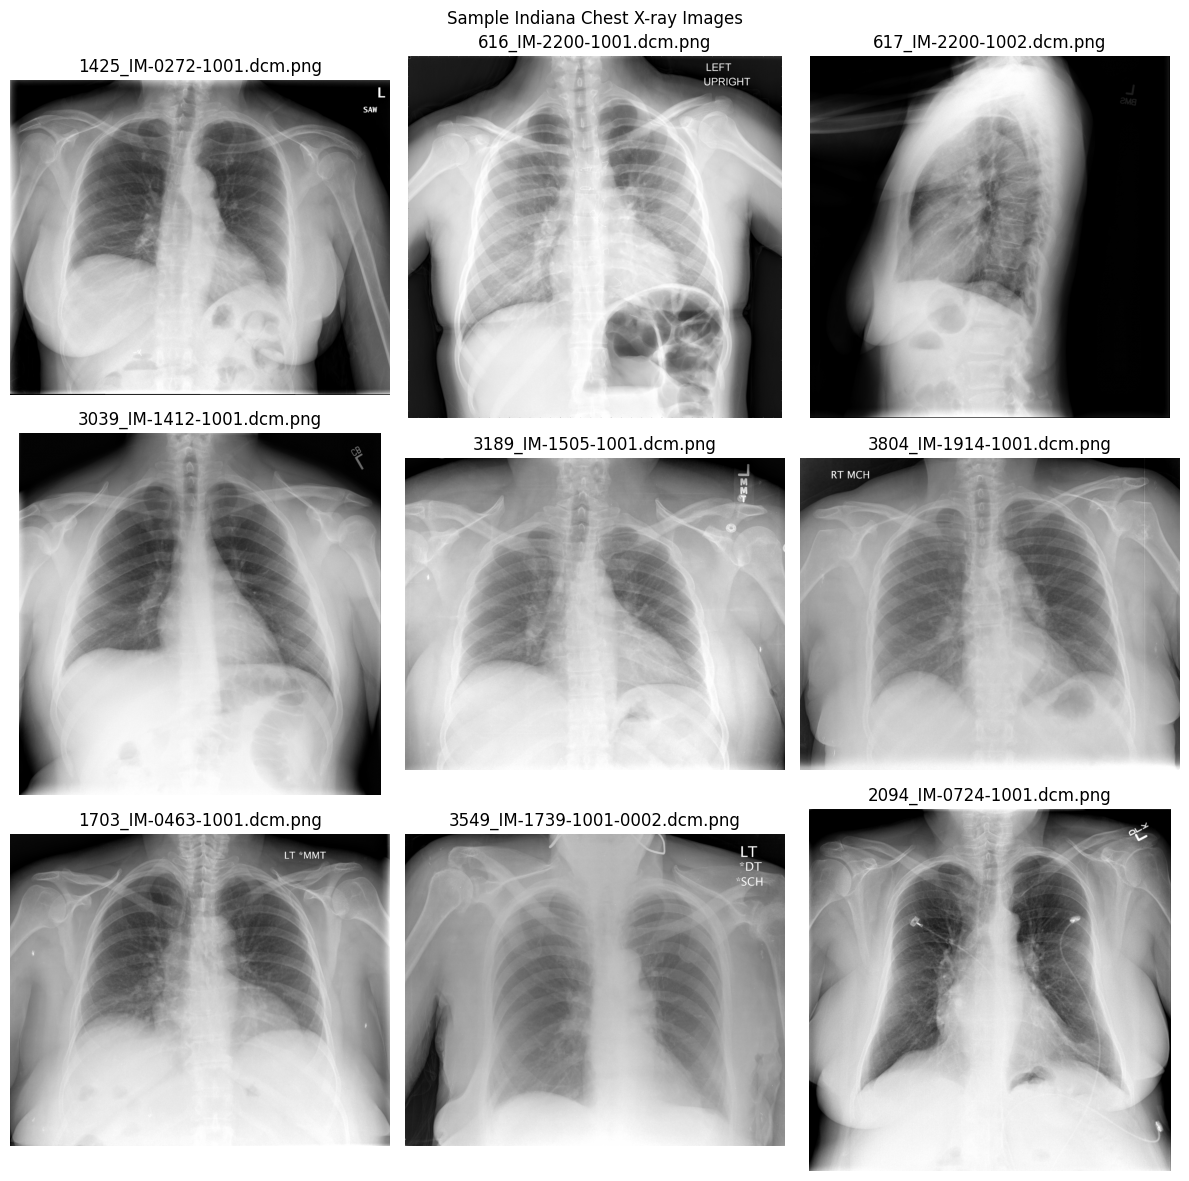

In [11]:
# 3. Visualize Sample Images
sample_images = os.listdir(image_dir)[:9]
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    img_path = os.path.join(image_dir, sample_images[i])
    img = Image.open(img_path)
    ax.imshow(img, cmap='gray')
    ax.set_title(sample_images[i])
    ax.axis('off')
plt.suptitle('Sample Indiana Chest X-ray Images')
plt.tight_layout()
plt.show()

In [12]:
# Check shape of first 10 images in image_dir
for fname in os.listdir(image_dir)[:10]:
    img_path = os.path.join(image_dir, fname)
    img = Image.open(img_path)
    print(f"{fname}: {img.size}, mode={img.mode}")

1425_IM-0272-1001.dcm.png: (2472, 2048), mode=L
616_IM-2200-1001.dcm.png: (2114, 2048), mode=L
617_IM-2200-1002.dcm.png: (2048, 2063), mode=L
3039_IM-1412-1001.dcm.png: (2048, 2048), mode=L
3189_IM-1505-1001.dcm.png: (2496, 2048), mode=L
3804_IM-1914-1001.dcm.png: (2496, 2048), mode=L
1703_IM-0463-1001.dcm.png: (2496, 2048), mode=L
3549_IM-1739-1001-0002.dcm.png: (2496, 2048), mode=L
2094_IM-0724-1001.dcm.png: (2048, 2048), mode=L
1249_IM-0169-1001.dcm.png: (2048, 2496), mode=L


In [13]:
# Show basic statistics for the reports
print("Number of reports:", len(reports_df))
print("Columns in reports_df:", reports_df.columns.tolist())
print("Number of missing values per column:")
print(reports_df.isnull().sum())

Number of reports: 2459
Columns in reports_df: ['uid', 'MeSH', 'Problems', 'image', 'indication', 'comparison', 'findings', 'impression']
Number of missing values per column:
uid           0
MeSH          0
Problems      0
image         0
indication    0
comparison    0
findings      0
impression    0
dtype: int64


In [14]:
print("\nFindings length statistics:")
report_lengths = reports_df['findings'].str.len()
print(report_lengths.describe())


Findings length statistics:
count    2459.000000
mean      224.316795
std        97.589291
min        33.000000
25%       156.000000
50%       213.000000
75%       276.000000
max       811.000000
Name: findings, dtype: float64


In [15]:
print("\nimpression length statistics:")
report_lengths = reports_df['impression'].str.len()
print(report_lengths.describe())


impression length statistics:
count    2459.000000
mean       60.943066
std        58.140056
min         5.000000
25%        33.000000
50%        39.000000
75%        68.000000
max       837.000000
Name: impression, dtype: float64


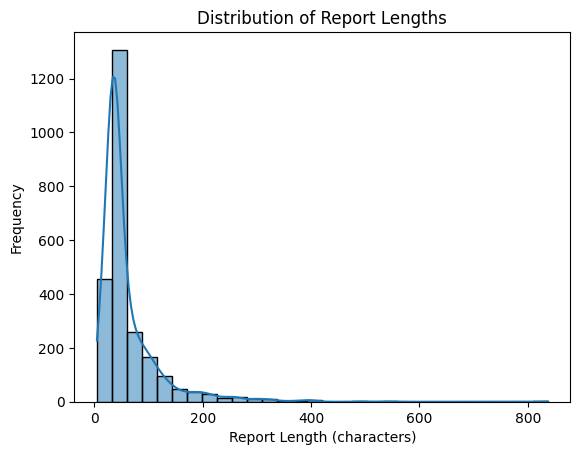

Sample reports:
Report 1:
Normal chest x-XXXX.
----------------------------------------
Report 2:
No acute pulmonary findings.
----------------------------------------
Report 3:
1. Bullous emphysema and interstitial fibrosis. 2. Probably scarring in the left apex, although difficult to exclude a cavitary lesion. 3. Opacities in the bilateral upper lobes could represent scarring, however the absence of comparison exam, recommend short interval followup radiograph or CT thorax to document resolution.
----------------------------------------


In [16]:
# Analyze Dataset Reports
# Plot distribution of report lengths
sns.histplot(report_lengths, bins=30, kde=True)
plt.title('Distribution of Report Lengths')
plt.xlabel('Report Length (characters)')
plt.ylabel('Frequency')
plt.show()

# Show a few sample reports
print('Sample reports:')
for i in range(3):
    print(f'Report {i+1}:')
    print(reports_df.iloc[i]['impression'])
    print('-'*40)